In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./final_data_2.csv') 
df['Display Size'] = pd.to_numeric(df['Display Size'], errors='coerce')
df = df.drop(columns=['Unnamed: 0'])
df = df[df['Announced'] > 2010]

# Question 1

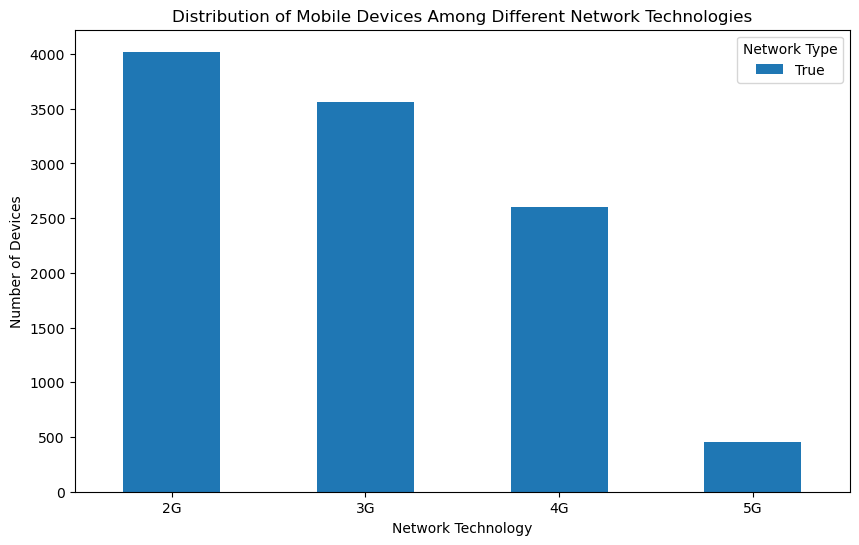

In [3]:
network_tech_count = df[['2G', '3G', '4G', '5G']].apply(pd.Series.value_counts)
network_tech_count = network_tech_count[network_tech_count.index == True].T

network_tech_count.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Mobile Devices Among Different Network Technologies')
plt.xlabel('Network Technology')
plt.ylabel('Number of Devices')
plt.xticks(rotation=0)
plt.legend(title='Network Type')
plt.show()

# Question 2

In [4]:
df[['Length', 'Width', 'Diameter']]

,Length,Width,Diameter
0,146.7,71.9,10.0
1,156.4,74.8,9.7
2,137.6,65.7,9.8
3,165.6,75.6,8.7
4,165.6,75.6,8.8
...,...,...,...
4598,108.0,44.8,14.3
4599,108.5,45.8,13.3
4614,190.1,120.5,12.0
4628,97.9,49.0,16.4


In [5]:
df['dimension'] = df['Length'] * df['Width']

In [6]:
corr_matrix = df[['dimension', 'Diameter', 'Display Size', 'Weight', 'pixel', 'body ratio', 'battery_capacity', 'ppi']]

In [7]:
corr_matrix

,dimension,Diameter,Display Size,Weight,pixel,body ratio,battery_capacity,ppi
0,10547.73,10.0,5.50,172.0,1036800.0,74.0,3000.0,293.0
1,11698.72,9.7,6.10,190.0,1123200.0,78.1,3000.0,282.0
2,9040.32,9.8,5.00,134.0,460800.0,71.4,2000.0,215.0
3,12519.36,8.7,6.52,194.0,1152000.0,82.0,4000.0,269.0
4,12519.36,8.8,6.52,190.0,1152000.0,82.0,4000.0,269.0
...,...,...,...,...,...,...,...,...
4598,4838.40,14.3,1.52,72.3,16384.0,15.4,1000.0,119.0
4599,4969.30,13.3,1.52,70.0,16384.0,15.0,800.0,119.0
4614,22907.05,12.0,7.00,380.0,614400.0,60.2,4000.0,170.0
4628,4797.10,16.4,2.40,92.7,76800.0,37.2,900.0,167.0


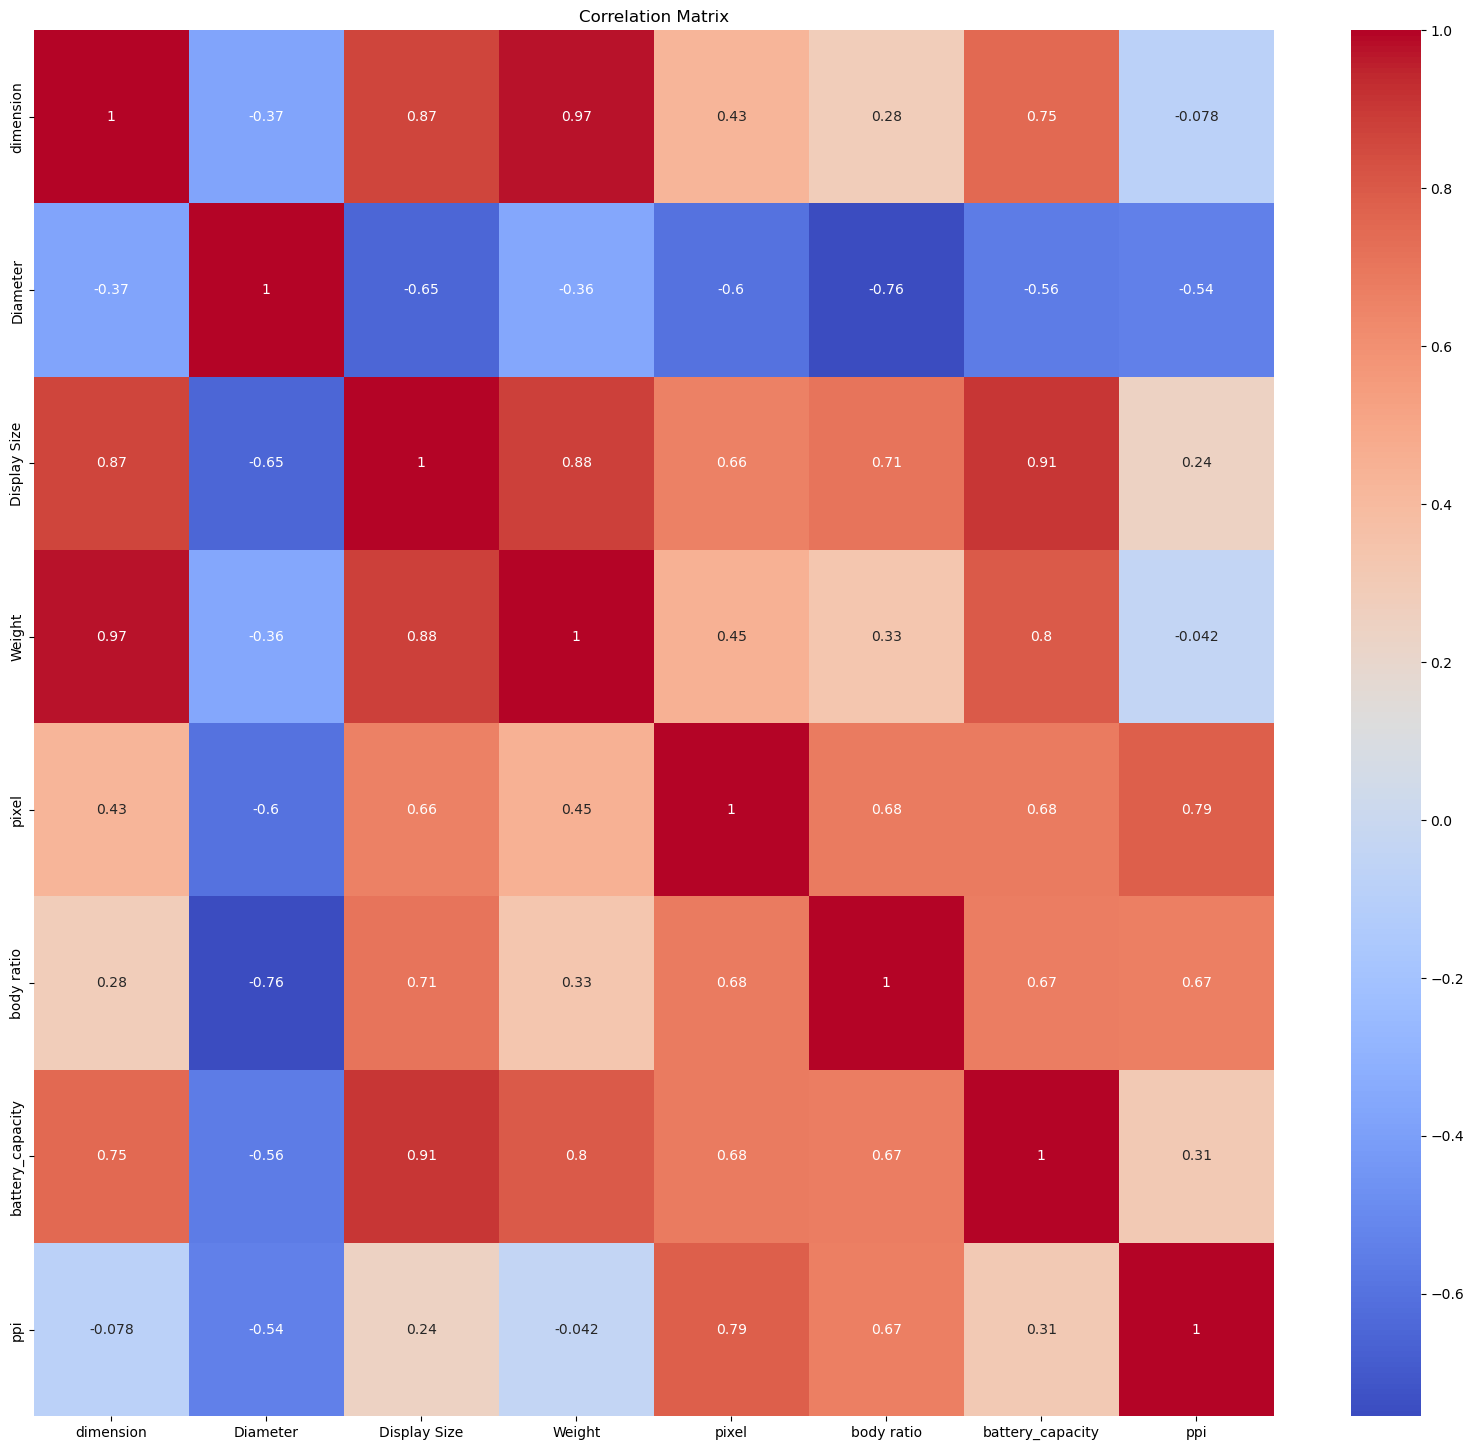

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = corr_matrix.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, ax=ax)

ax.set_title('Correlation Matrix')
ax.set_yticklabels(numeric_df.columns)
ax.set_xticklabels(numeric_df.columns)

plt.show()

# Question 3

In [9]:
sim_count = df['SIM'].value_counts()

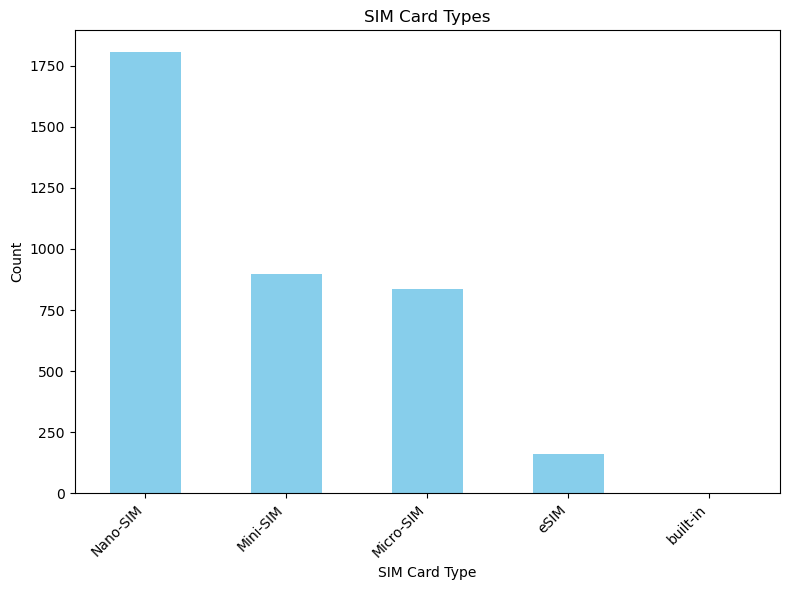

In [10]:
simcard_counts = df['SIM'].value_counts()

plt.figure(figsize=(8, 6))
sim_count.plot(kind='bar', color='skyblue')
plt.title('SIM Card Types')
plt.xlabel('SIM Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Nano-SIM is the most commonly used SIM.

# Question 4

In [11]:
top_10_android = list(df['OS'].value_counts().head(10).index)
df_top_10 = pd.DataFrame({'OS': top_10_android}, index=range(1, 11))

In [12]:
df_top_10

,OS
1,Android 10
2,Android 11
3,Android 4.4.2
4,Android 9.0
5,Android 12
6,Android 6.0
7,Android 8.1
8,Android 13
9,Android 2.3
10,Android 5.1


# Question 5

In [13]:
top_50_expensive = df[['Price', 'OS']].dropna().sort_values(ascending=False, by='Price').head(50)

In [14]:
top_50_expensive.value_counts('OS')

OS
Android 10       12
Android 9.0       6
Android 12        5
Android 11        4
Android 13        3
Android 14        2
Android 8.1       2
watchOS 3.0       2
watchOS 1.0       2
HarmonyOS 3.1     2
HarmonyOS 4.0     2
iPadOS 14.5.1     1
iPadOS 16.1       1
HarmonyOS 3.0     1
iOS 17            1
iOS 12            1
HarmonyOS 2.0     1
EMUI 12           1
watchOS 4.0       1
Name: count, dtype: int64

In [15]:
total_android = 0
total_ios = 0
total_else = 0

for i, j in top_50_expensive['OS'].value_counts().items():
    if i.startswith('Android'):
        total_android += j
    elif i.startswith('iOS'):
        total_ios += j
    else:
        total_else += j

print(f'total android = {total_android}, total ios = {total_ios}, total else = {total_else}')


total android = 34, total ios = 2, total else = 14


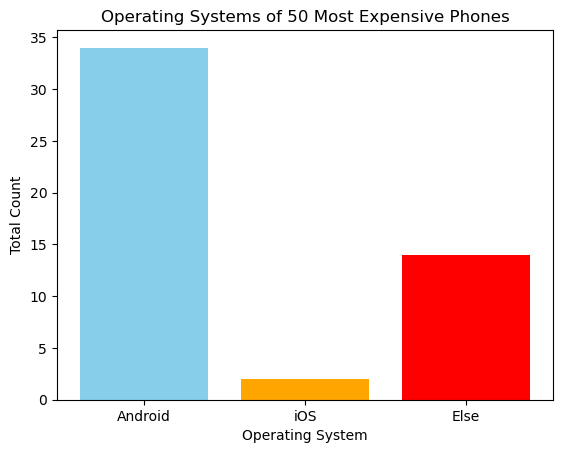

In [16]:
top_50_expensive = {'Android': 34, 'iOS': 2, 'Else': 14}

plt.bar(top_50_expensive.keys(), top_50_expensive.values(), color=['skyblue', 'orange', 'red'])
plt.xlabel('Operating System')
plt.ylabel('Total Count')
plt.title('Operating Systems of 50 Most Expensive Phones')
plt.show()

### Analysis:

From the distribution, it's evident that the majority of the top 50 expensive phones run on various versions of the Android operating systems because we potentially have far more Android phones in the data than those of other operating systems. Other OSs like iOS, HarmonyOS, watchOS, and iPadOS are also present, but their frequencies are comparatively lower. 

# Question 6

In [17]:
df['brand']

0       alcatel
1       alcatel
2       alcatel
3       alcatel
4       alcatel
         ...   
4598    samsung
4599    samsung
4614    samsung
4628    samsung
4694    samsung
Name: brand, Length: 4021, dtype: object

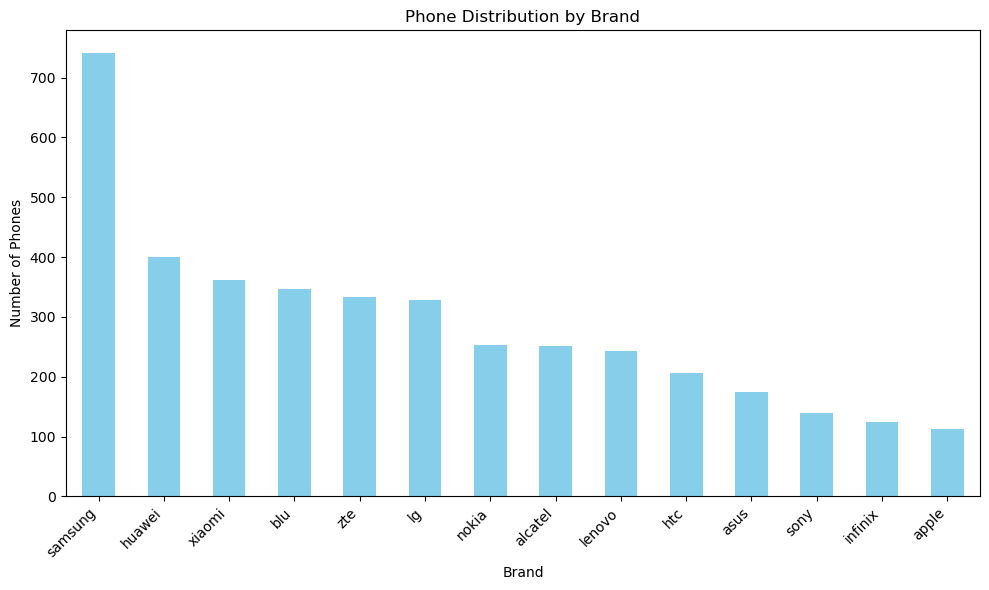

In [18]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Phone Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Phone Distribution by Brand')

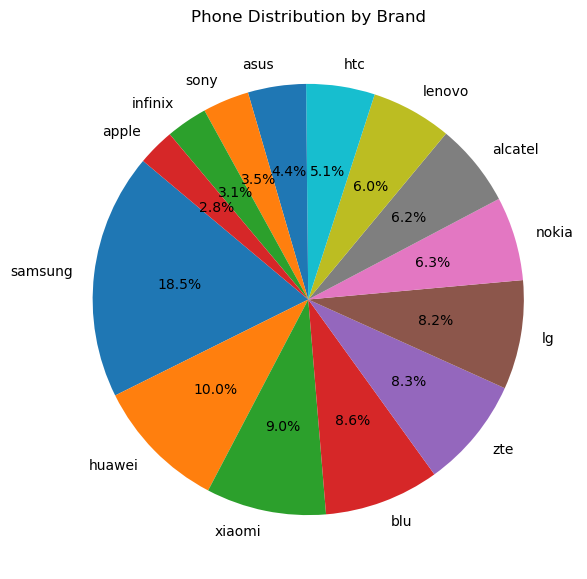

In [19]:
plt.figure(figsize=(7, 7))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, textprops={'color':"black"})
plt.title('Phone Distribution by Brand', color='black')

# Question 7

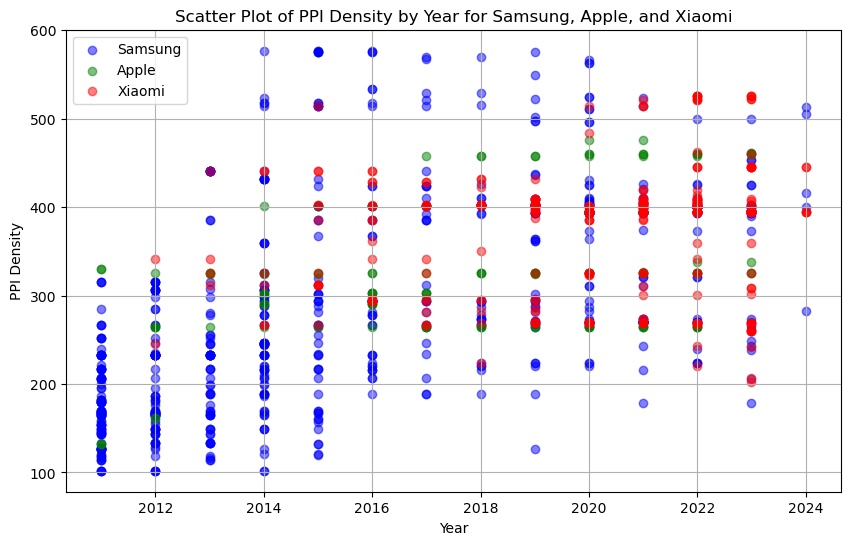

In [20]:
samsung_data = df[df['brand'] == 'samsung']
apple_data = df[df['brand'] == 'apple']
xiaomi_data = df[df['brand'] == 'xiaomi']

plt.figure(figsize=(10, 6))
plt.scatter(samsung_data['Announced'], samsung_data['ppi'], label='Samsung', color='blue', alpha=0.5)
plt.scatter(apple_data['Announced'], apple_data['ppi'], label='Apple', color='green', alpha=0.5)
plt.scatter(xiaomi_data['Announced'], xiaomi_data['ppi'], label='Xiaomi', color='red', alpha=0.5)

plt.title('Scatter Plot of PPI Density by Year for Samsung, Apple, and Xiaomi')
plt.xlabel('Year')
plt.ylabel('PPI Density')
plt.legend()
plt.grid(True)
plt.show()

### Analysis:

#### All 3 brands have made improvements in PPI Density through the years and from the density of points, it is obvious that Samsung and Apple have made the most improvements and Xiaomi the least.

From the scatter plot, it is obvious that Samsung usually holds the place for the highest PPI Density each year, but the lowest ones belong to this brand as well.

Xiami used to have an average PPI Density, but in the recent years they have improved.

# Question 8

In [21]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [22]:
numeric_columns
numeric_columns = numeric_columns.rename(columns={'CPU': 'CPU core'})

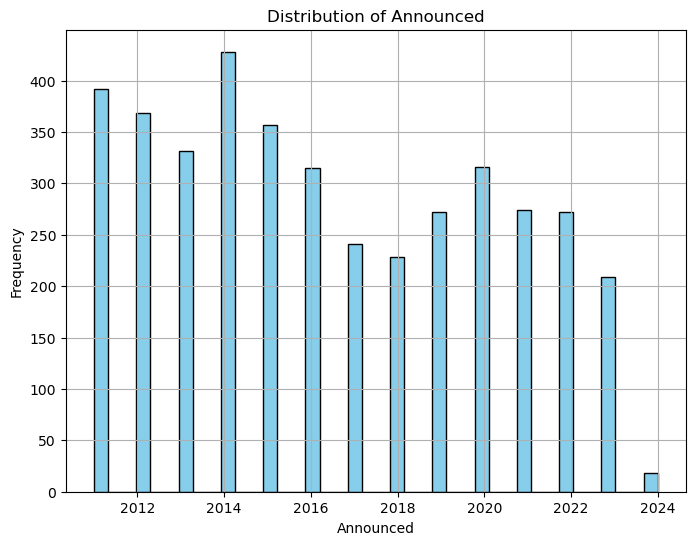

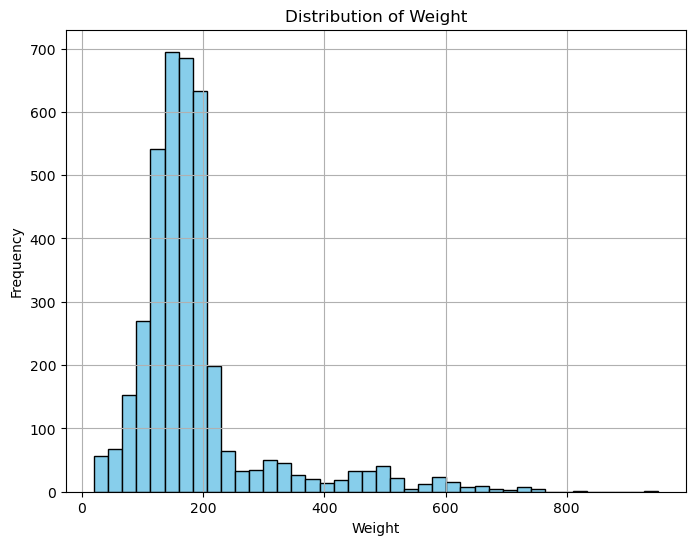

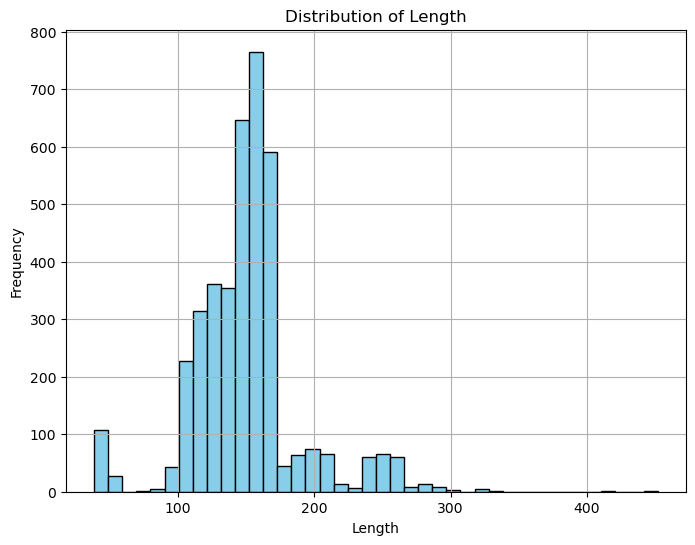

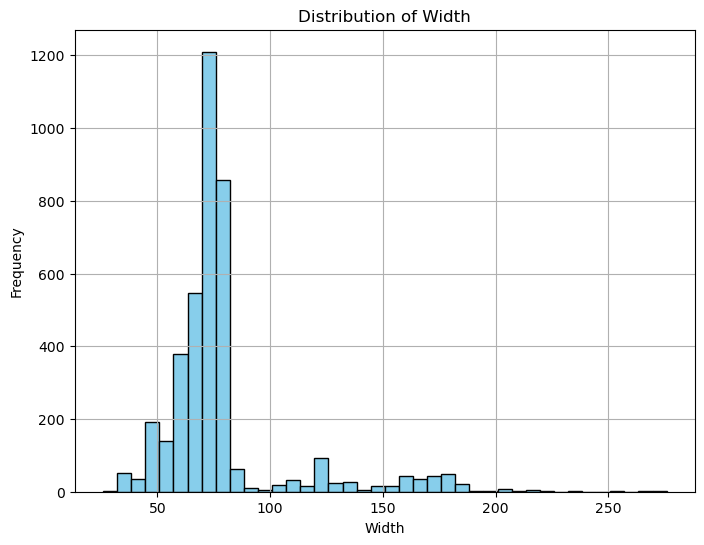

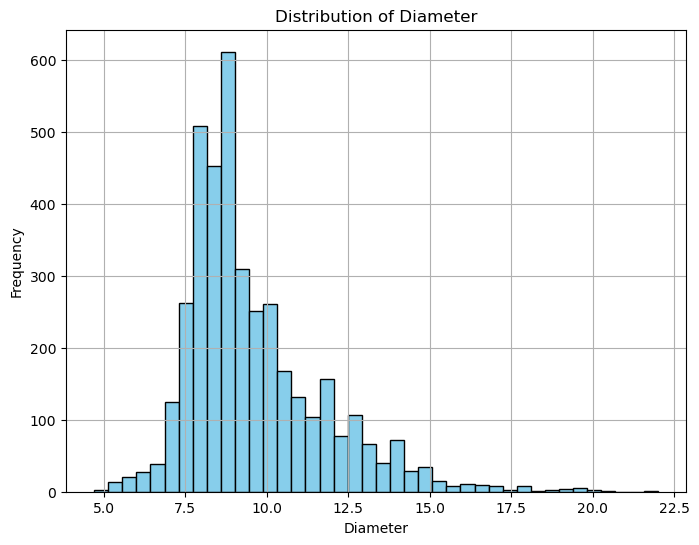

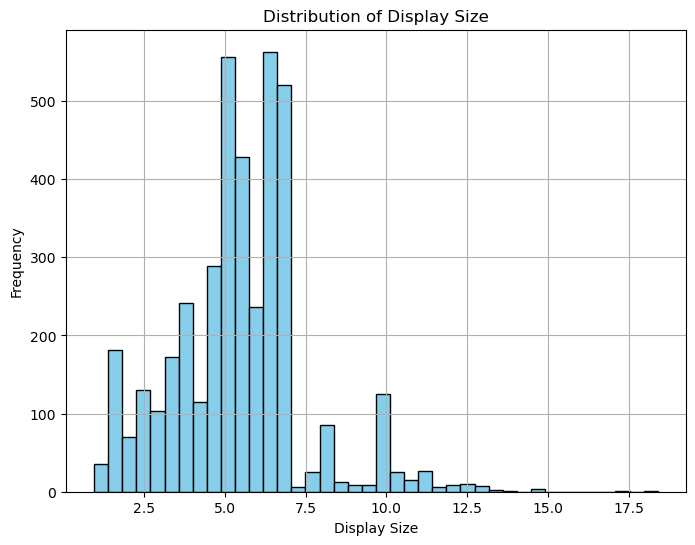

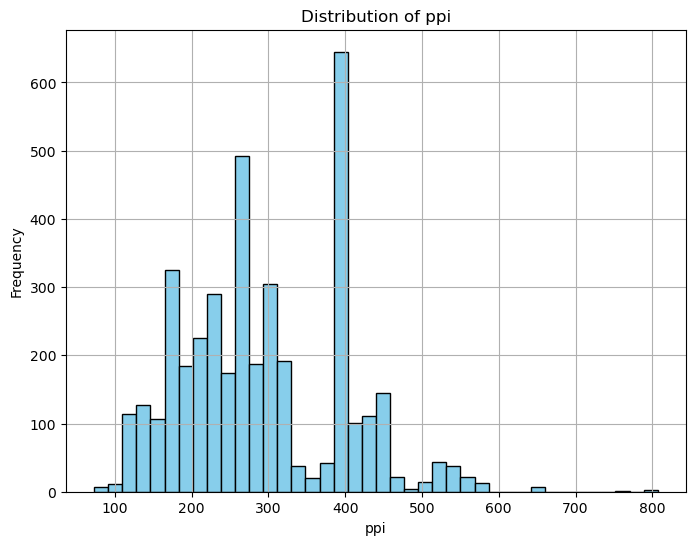

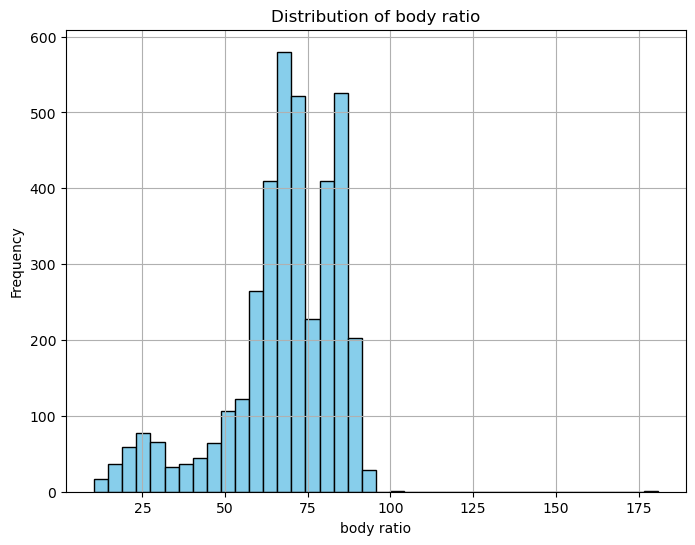

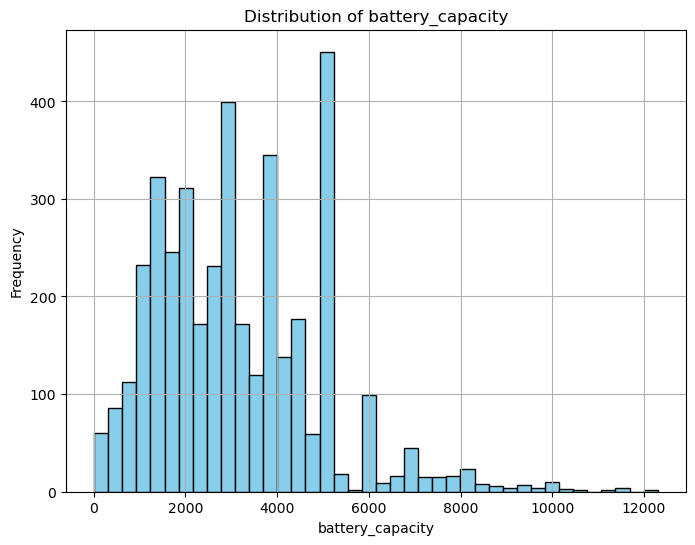

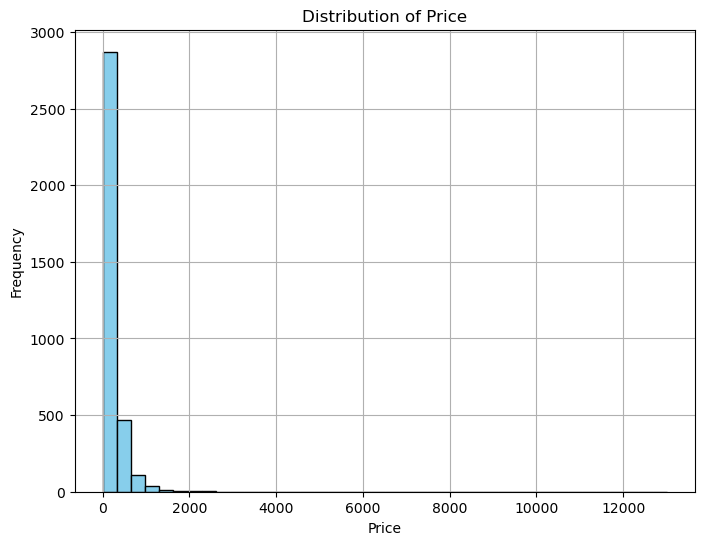

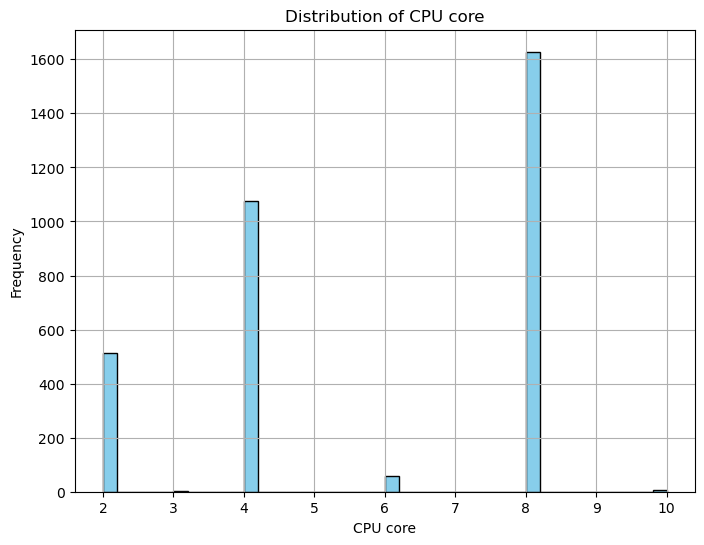

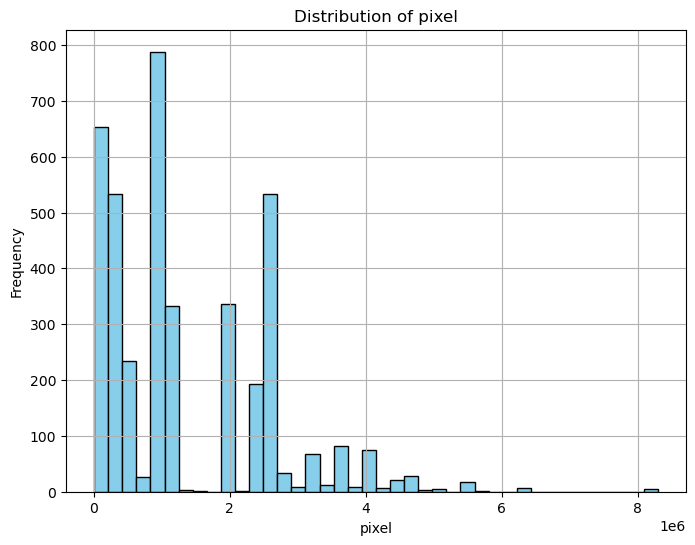

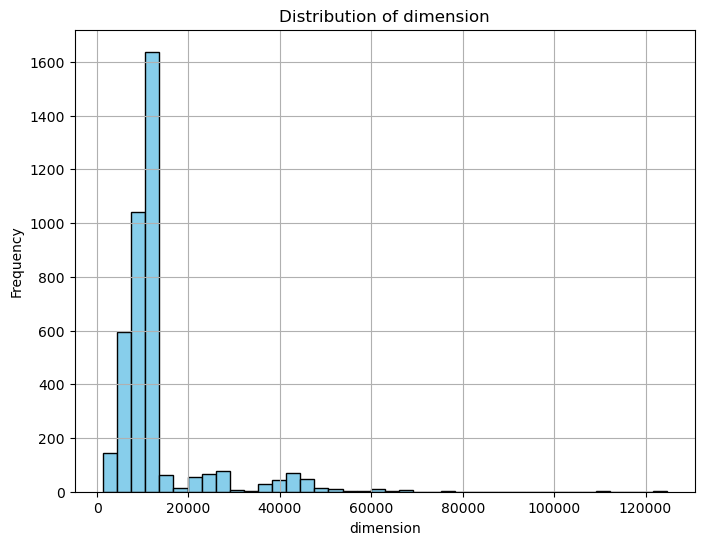

In [23]:
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numeric_columns[column].dropna(), bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()